**Author: Pabishetti Sravani**

**Task3 - Exploratory Data Analysis - Retail**

**Problem Statement:** As a business manager, try to find out the weak areas where you can
work to make more profit.

What all business problems you can derive by exploring the data?


**Importing the required libraries**

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.style.use('dark_background')
font = {'family': 'serif',
        'color':  'white',
        'weight': 'normal',
        'size': 16,
        }
import seaborn as sns

**Uploading the files**

In [105]:
from google.colab import files
uploaded = files.upload()

Saving SampleSuperstore.csv to SampleSuperstore (1).csv


In [3]:
df = pd.read_csv("/content/SampleSuperstore.csv")

In [4]:
df.shape

(9994, 13)

In [5]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


**Checking for the duplicate entries**

In [6]:
dupes=df.duplicated(subset = None,keep="first")
sum(dupes)

17

In [7]:
store_data=df.drop_duplicates(subset = None,keep="first")

In [14]:
store_data.shape

(9977, 13)

In [8]:
store_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [9]:
store_data["Category"].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

In [10]:
store_data["Ship Mode"].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

In [11]:
store_data["Sub-Category"].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [15]:
store_data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


**Postal code can be converted into categorical variable**

In [16]:
store_data["Postal Code"] = store_data["Postal Code"].astype({'Postal Code': 'object'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**Finding the correlation between the numerical variables**

In [17]:
store_data.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


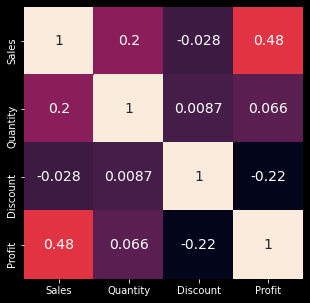

In [20]:
# PLotting Correlation between Variables
plt.figure(figsize=(5,5))
sns.heatmap(store_data.corr(), annot=True, cbar=False, annot_kws={'size':14})
plt.show()

In [21]:
store_data.info()
#checking for the missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   object 
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 1.1+ MB


In [22]:
columns = store_data.columns

In [23]:
columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [24]:
cat_cols = store_data.select_dtypes(include=['object']).columns
#storing all the categorical features in cat_cols

In [25]:
cat_cols

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category'],
      dtype='object')

In [26]:
#storing all the numerical columns in num_cols
num_cols = [i for i in columns if i not in cat_cols]
num_cols

['Sales', 'Quantity', 'Discount', 'Profit']

**Calculating the total profits(state-wise) and sorting them by profits and storing into a dataframe**

In [39]:
statewise_profits = pd.pivot_table(data=store_data,index='State',values='Profit',aggfunc=np.sum)
statewise_profits = statewise_profits.sort_values(by = ["Profit"],axis = 0,ascending =False )

In [107]:
statewise_profits = pd.DataFrame(statewise_profits)

In [113]:
statewise_profits.head()

,Profit
State,
California,76330.7891
New York,74015.4622
Washington,33368.2375
Michigan,24428.0903
Virginia,18597.9504


**Calculating the total sales(state-wise) and storing into a dataframe**

In [31]:
statewise_sales = pd.pivot_table(data=store_data,index='State',values='Sales',aggfunc=np.sum)

In [112]:
statewise_sales = pd.DataFrame(statewise_sales)
statewise_sales.head()

,Sales
State,
Alabama,19510.6400
Arizona,35282.0010
Arkansas,11678.1300
California,457576.2715
Colorado,32108.1180


**Merging statewise sales and statewise profits into a new dataframe and sorting values by total profit in descending order**

In [34]:
statewise_profits_sales  = pd.DataFrame({'Profit': statewise_profits["Profit"],'Sales' : statewise_sales["Sales"]})
statewise_profits_sales = statewise_profits_sales.sort_values(by = ["Profit"],ascending= False)

In [111]:
statewise_profits_sales.head()

,Profit,Sales
State,,
California,76330.7891,457576.2715
New York,74015.4622,310827.1510
Washington,33368.2375,138560.8100
Michigan,24428.0903,75879.6440
Virginia,18597.9504,70636.7200


**list of states which incurred loss**

In [36]:
statewise_profits_sales[statewise_profits_sales["Profit"]<0]

,Profit,Sales
State,,
Oregon,-1194.0993,17420.7820
Florida,-3399.3017,89473.7080
Arizona,-3427.9246,35282.0010
Tennessee,-5341.6936,30661.8730
Colorado,-6527.8579,32108.1180
North Carolina,-7490.9122,55603.1640
Illinois,-12601.6500,80162.5370
Pennsylvania,-15565.4035,116496.3620
Ohio,-16959.3178,77976.7640


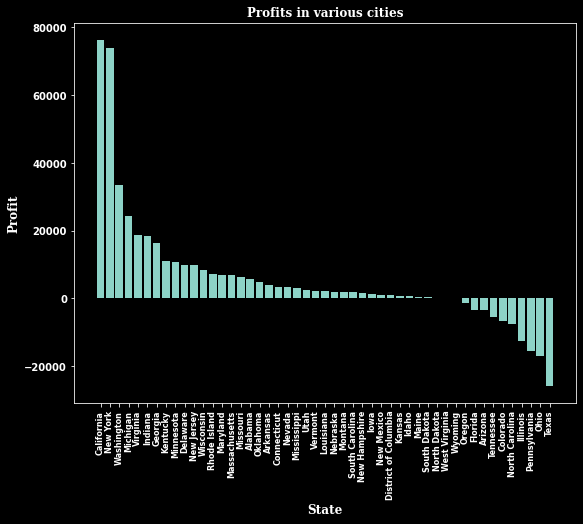

In [42]:

font1 = {'family': 'serif',
        'color':  'white',
        'weight': 'bold',
        'size': 12,
        }
#plt.figsize = (10,10)
f = figure(figsize=(9,7))
plt.bar(statewise_profits.index,statewise_profits['Profit'])
plt.xticks(rotation=90,fontsize = 8,weight = "bold") 
plt.yticks(fontsize = 10,weight = "bold")
plt.xlabel('State',fontdict=font1) 
plt.ylabel('Profit',fontdict=font1) 
plt.title('Profits in various cities',fontdict=font1)  
plt.show();

**Graph of total profit(calculated state-wise) vs total sales(calculated state-wise)**

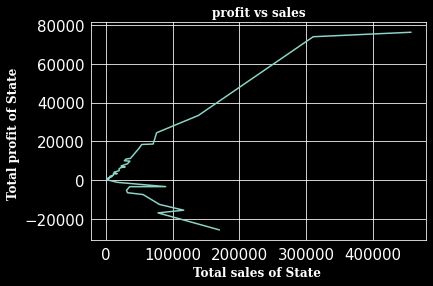

In [108]:
plt.plot(statewise_profits_sales["Sales"], statewise_profits_sales["Profit"])
plt.xticks(rotation=0,fontsize = 15) 
plt.yticks(fontsize = 15)
plt.xlabel('Total sales of State ',fontdict=font1) 
plt.ylabel('Total profit of State ',fontdict=font1) 
plt.title('profit vs sales',fontdict=font1)  
plt.show();

**graph of profit vs discount for the overall dataset**

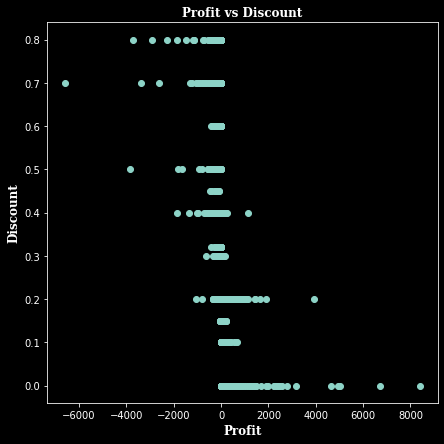

In [46]:
f = figure(figsize=(7,7))
plt.scatter(store_data["Profit"], store_data["Discount"])
plt.xlabel('Profit',fontdict=font1) 
plt.ylabel('Discount',fontdict=font1) 
plt.title('Profit vs Discount',fontdict=font1)  
plt.show();

**Visualising 4 variables using catplot**

X-axis:category

Y:axis:Profit

Hue: segment

Each subplot is for each region

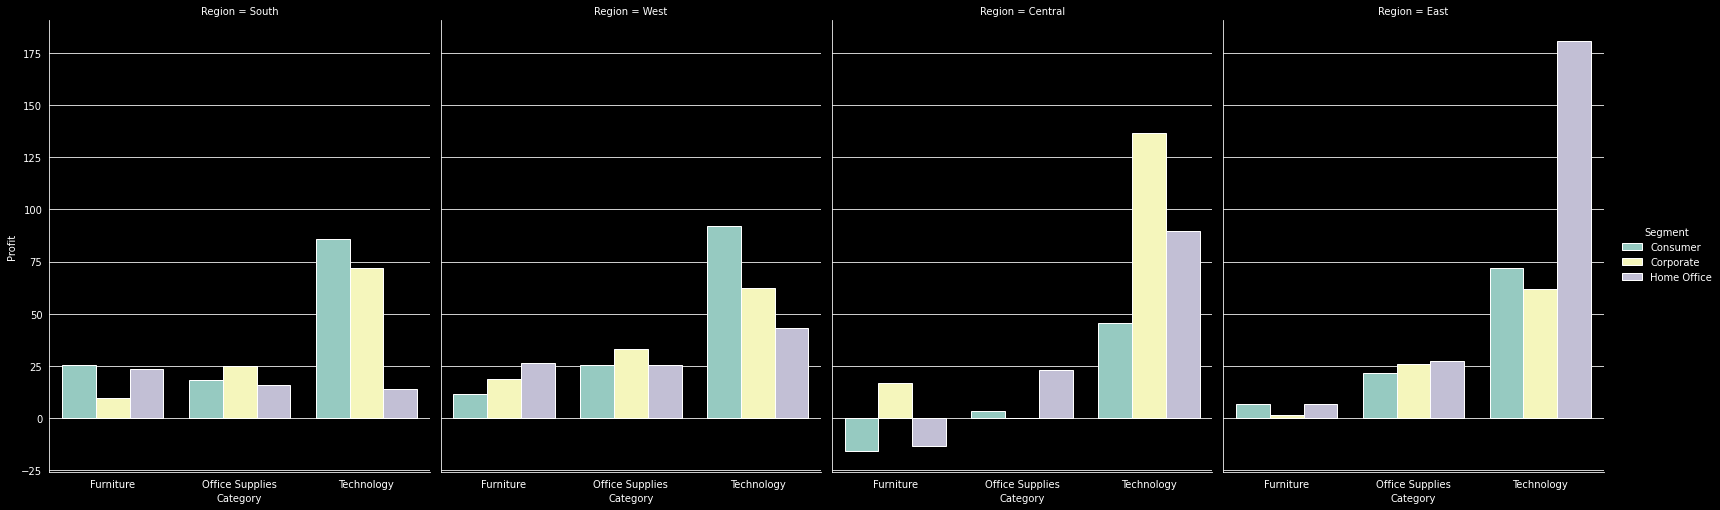

In [99]:
g = sns.catplot(x="Category", y="Profit",
                hue="Segment", col="Region",ci = None,
                data=store_data, kind="bar",
                height=7, aspect = 0.8);
            

**Calculating the overall profit segment wise**

In [48]:
segmentwise_profits = pd.pivot_table(data=store_data,index='Segment',values='Profit',aggfunc=np.sum)
segmentwise_profits

,Profit
Segment,
Consumer,134007.4413
Corporate,91954.9798
Home Office,60279.0015


**Profit distribution segment-wise**

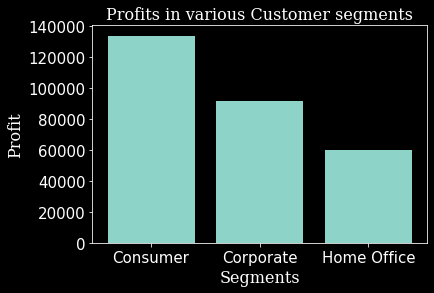

In [49]:
plt.bar(segmentwise_profits.index,segmentwise_profits['Profit'])
plt.xticks(rotation=0,fontsize = 15) 
plt.yticks(fontsize = 15)
plt.xlabel('Segments',fontdict=font) 
plt.ylabel('Profit',fontdict=font) 
plt.title('Profits in various Customer segments',fontdict=font)  
plt.show();

**Calculating the overall profit region wise**

In [50]:
regionwise_profits = pd.pivot_table(data=store_data,index='Region',values='Profit',aggfunc=np.sum)
regionwise_profits

,Profit
Region,
Central,39655.8752
East,91506.3092
South,46749.4303
West,108329.8079


**Profit distribution region-wise**

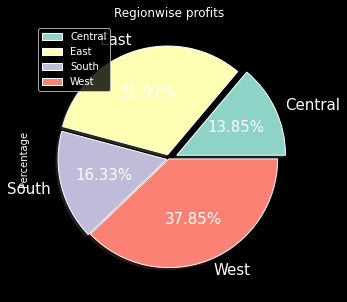

In [103]:
plot = regionwise_profits.plot.pie(y='Profit', figsize=(5, 5),autopct='%1.2f%%', label='Percentage', 
                       textprops = {"fontsize":15}, shadow=True, explode=(0.08,0.04,0.02,0),title = "Regionwise profits")

**Calculating the overall sales region wise**

In [53]:
regionwise_sales = pd.pivot_table(data=store_data,index='Region',values='Sales',aggfunc=np.sum)
regionwise_sales

,Sales
Region,
Central,500782.8528
East,678435.1960
South,391721.9050
West,725255.6365


**Sales distribution region-wise**

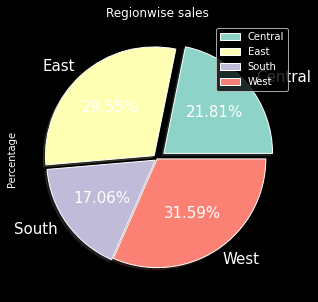

In [101]:
plot = regionwise_sales.plot.pie(y='Sales', figsize=(5, 5),autopct='%1.2f%%', label='Percentage', 
                       textprops = {"fontsize":15}, shadow=True, explode=(0.08,0.04,0.02,0),title = "Regionwise sales")

**Classifying the sales into 3 categories based profit,loss, and neutral and calculating the percentage of sales for each category**

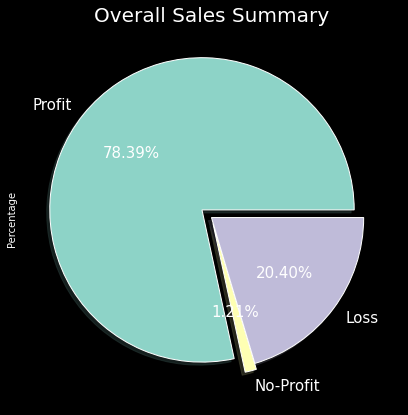

In [61]:
sales_overall = pd.DataFrame({'Profit':store_data.Sales[store_data.Profit > 0].sum(), 
                        'No-Profit':store_data.Sales[store_data.Profit == 0].sum(), 
                        'Loss':store_data.Sales[(store_data.Profit) < 0].sum()},
                       index={'Count'}).T
plt.title('Overall Sales Summary', fontsize=20)
sales_overall.Count.plot.pie(autopct='%1.2f%%',figsize=(7,7), label='Percentage', 
                       textprops = {"fontsize":15}, shadow=True, explode=(0.08,0.04,0))
plt.show()

**Sales distribution category-wise**

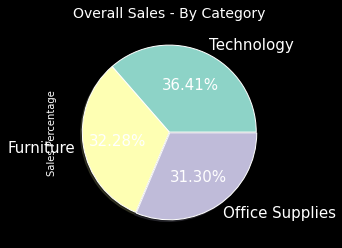

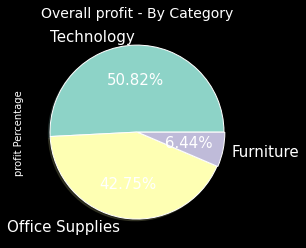

In [62]:

cat = np.round(store_data.groupby('Category').sum(), decimals=2).sort_values('Sales', ascending=False)
plt.title('Overall Sales - By Category', fontsize=14)
cat.Sales.plot.pie(autopct='%1.2f%%', figsize=(4,4,), label='Sales Percentage', 
                    textprops = {"fontsize":15}, explode=(0, 0, 0.01), shadow=True)
plt.show()
cat_profit = np.round(store_data.groupby('Category').sum(), decimals=2).sort_values('Profit', ascending=False)
plt.title('Overall profit - By Category', fontsize=14)
cat_profit.Profit.plot.pie(autopct='%1.2f%%', figsize=(4,4), label='profit Percentage', 
                    textprops = {"fontsize":15}, explode=(0, 0, 0.01), shadow=True)
plt.show()


**Distribution of overall quantities of products sold from varies categories - (Left Image)**

**Distribution of overall quantities of products sold from varies sub-categories - (Right Image)**

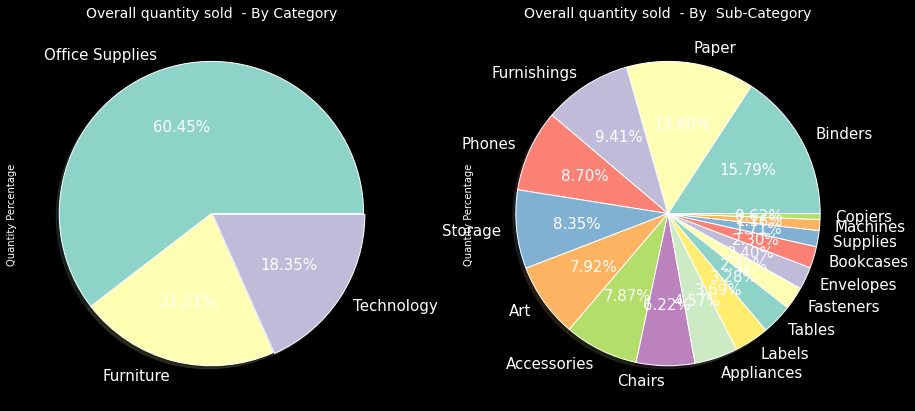

In [65]:
cat_quantity = np.round(store_data.groupby('Category').sum(), decimals=2).sort_values('Quantity', ascending=False)
cat_subcategory = np.round(store_data.groupby('Sub-Category').sum(), decimals=2).sort_values('Quantity', ascending=False)
fig,ax = plt.subplots(1,2,figsize = (15,10))

ax[0].set_title('Overall quantity sold  - By Category', fontsize=14)
ax[1].set_title('Overall quantity sold  - By  Sub-Category', fontsize=14)
cat_quantity.Quantity.plot.pie(autopct='%1.2f%%', label='Quantity Percentage', 
                    textprops = {"fontsize":15}, explode=(0, 0, 0.01), shadow=True,ax= ax[0])
cat_subcategory.Quantity.plot.pie(autopct='%1.2f%%', label='Quantity Percentage', 
                    textprops = {"fontsize":15}, shadow=True,ax = ax[1])
plt.show()

**Taking only the rows which have profit<0 (i.e loss) and storing into a new data frame - loss_data**

In [109]:
loss_data = np.round(store_data[-(store_data.Profit) > 0], decimals=2).sort_values('Profit')
loss_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
7772,Standard Class,Consumer,United States,Lancaster,Ohio,43130,East,Technology,Machines,4499.98,5,0.7,-6599.98
683,Same Day,Corporate,United States,Burlington,North Carolina,27217,South,Technology,Machines,7999.98,4,0.5,-3839.99
9774,Standard Class,Consumer,United States,San Antonio,Texas,78207,Central,Office Supplies,Binders,2177.58,8,0.8,-3701.89
3011,Standard Class,Home Office,United States,Louisville,Colorado,80027,West,Technology,Machines,2549.98,5,0.7,-3399.98
4991,Standard Class,Corporate,United States,Chicago,Illinois,60653,Central,Office Supplies,Binders,1889.99,5,0.8,-2929.48


**In loss_data dataframe calculating the total profits grouped by regions- Left Image**

**In loss_data dataframe calculating the total profits grouped by state- Right Image**

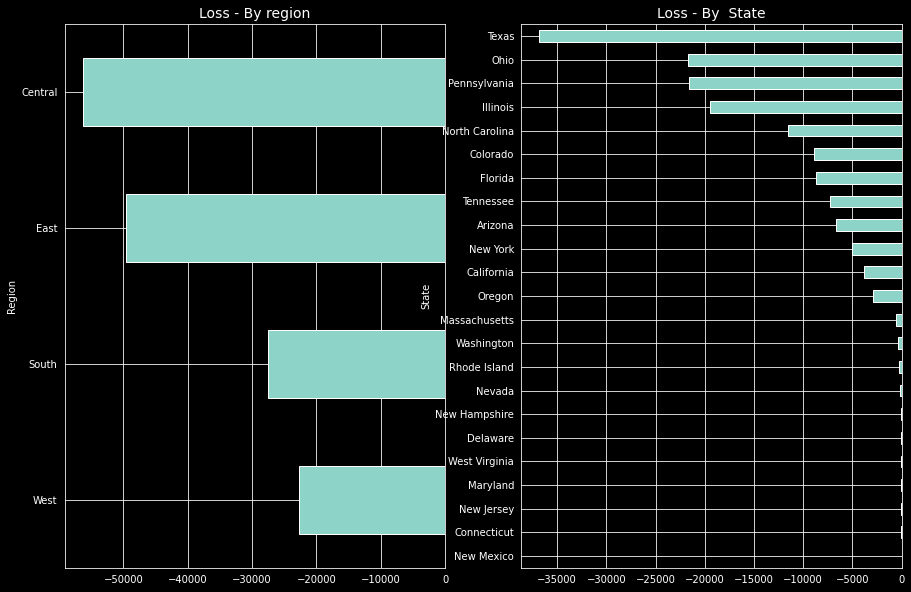

In [70]:
loss_region = np.round(loss_data.groupby('Region').sum(), decimals=2).sort_values('Profit', ascending=False)
loss_subcategory = np.round(loss_data.groupby('State').sum(), decimals=2).sort_values('Profit', ascending=False)
fig,ax = plt.subplots(1,2,figsize = (15,10))

ax[0].set_title('Loss - By region', fontsize=14)
ax[1].set_title('Loss - By  State', fontsize=14)
loss_region.Profit.plot.barh( label='Quantity Percentage',ax= ax[0])
loss_subcategory.Profit.plot.barh(label='Quantity Percentage',ax = ax[1])
plt.show()

In [91]:
loss_region

,Sales,Quantity,Discount,Profit
Region,,,,
West,74925.22,1245,118.15,-22721.07
South,91635.11,1004,127.35,-27504.85
East,160582.73,1986,246.80,-49578.71
Central,141279.05,2800,406.34,-56308.71


**Analyzing only central region**

In [71]:
central_data = store_data[store_data["Region"] == "Central"].sort_values("Profit")

In [110]:
central_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9774,Standard Class,Consumer,United States,San Antonio,Texas,78207,Central,Office Supplies,Binders,2177.584,8,0.8,-3701.8928
4991,Standard Class,Corporate,United States,Chicago,Illinois,60653,Central,Office Supplies,Binders,1889.990,5,0.8,-2929.4845
5310,First Class,Consumer,United States,Houston,Texas,77095,Central,Office Supplies,Binders,1525.188,6,0.8,-2287.7820
1199,Standard Class,Consumer,United States,Houston,Texas,77041,Central,Office Supplies,Binders,1088.792,4,0.8,-1850.9464
3324,Standard Class,Consumer,United States,Houston,Texas,77095,Central,Office Supplies,Binders,896.990,5,0.8,-1480.0335


**In central region calculating the total profits grouped by states- Left Image**


**In central region calculating the total profits grouped by sub-category- Right Image**

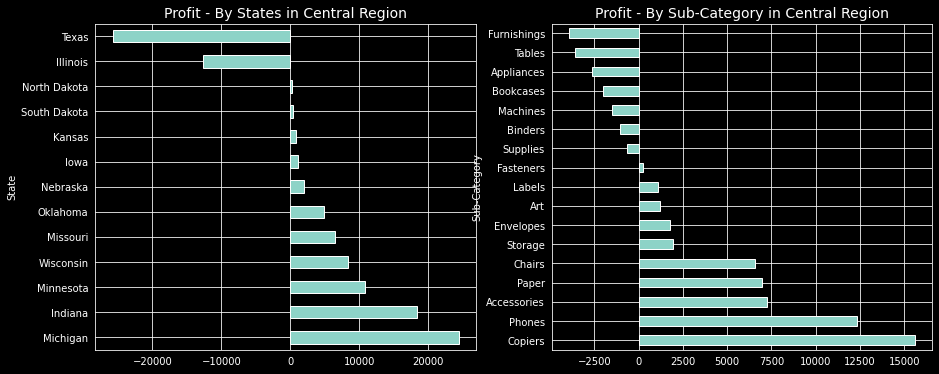

In [75]:
loss_central = np.round(central_data.groupby('State').sum(), decimals=2).sort_values('Profit', ascending=False)
loss_central_subcategory = np.round(central_data.groupby('Sub-Category').sum(), decimals=2).sort_values('Profit', ascending=False)
fig,ax = plt.subplots(1,2,figsize = (15,6))

ax[0].set_title('Profit - By States in Central Region', fontsize=14)
ax[1].set_title('Profit - By Sub-Category in Central Region', fontsize=14)
loss_central.Profit.plot.barh( label='Quantity Percentage',ax= ax[0])
loss_central_subcategory.Profit.plot.barh(label='Quantity Percentage',ax = ax[1])
plt.show()

**Analyzing only central region**

In [73]:
east_data = store_data[store_data["Region"] == "East"].sort_values("Profit")

**In eastern region calculating the total profits grouped by states- Left Image**


**In eastern region calculating the total profits grouped by sub-category- Right Image**

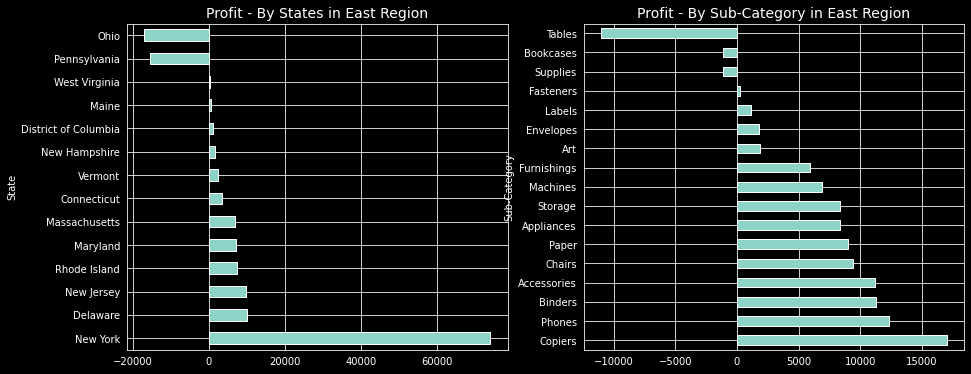

In [74]:
loss_east = np.round(east_data.groupby('State').sum(), decimals=2).sort_values('Profit', ascending=False)
loss_east_subcategory = np.round(east_data.groupby('Sub-Category').sum(), decimals=2).sort_values('Profit', ascending=False)
fig,ax = plt.subplots(1,2,figsize = (15,6))

ax[0].set_title('Profit - By States in East Region', fontsize=14)
ax[1].set_title('Profit - By Sub-Category in East Region', fontsize=14)
loss_east.Profit.plot.barh(ax= ax[0])
loss_east_subcategory.Profit.plot.barh(ax = ax[1])
plt.show()

**Storing all the rows belonging to the states Texas, pennsylvania, Illinois and Ohio into a new dataframe - loss_states**

In [85]:
loss_States = store_data[(store_data.State == 'Texas') 
| (store_data.State == 'Illinois')
|(store_data.State == "Ohio")
|(store_data.State == "Pennsylvania")].iloc[:]

**Profits for loss_states dataframe calculated subcategory wise**

Text(0.5, 0.98, 'Profit of each sub-category in loss states')

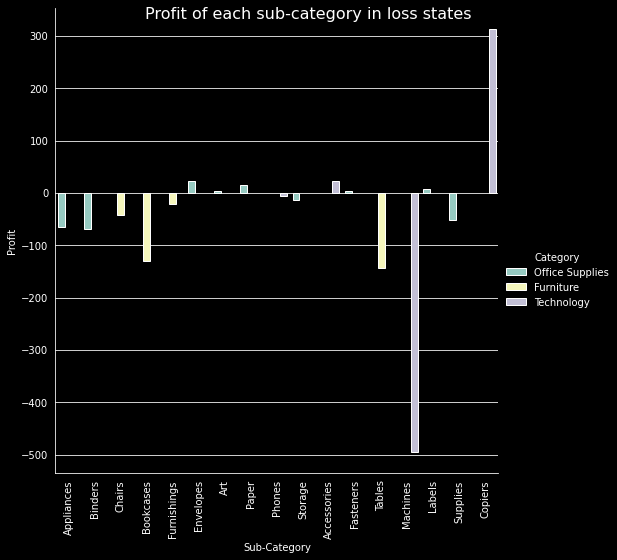

In [90]:
g = sns.catplot(x="Sub-Category", y="Profit",
                hue="Category",ci = None,
                data=loss_States, kind="bar",
                height=7, aspect = 1);
g.set_xticklabels(rotation = 90)
g.fig.suptitle("Profit of each sub-category in loss states",fontsize = 16)


**Discount vs Profit for  loss_states data - left image**

**Discount vs sales for  loss_states data - left image**

**NOTE: loss_state has rows only from Ohio, Pennsylvania, Texas and  Illinois**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


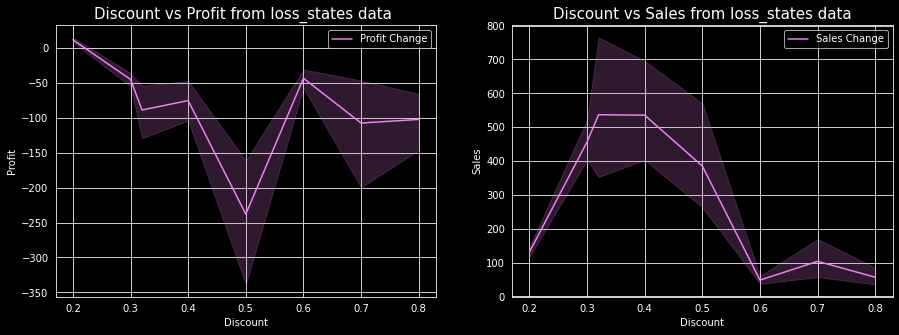

In [84]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].set_title('Discount vs Profit from loss_states data ', fontsize=15)
ax[1].set_title('Discount vs Sales from loss_states data', fontsize=15)
sns.lineplot(loss_States.Discount, loss_States.Profit, color='violet', label='Profit Change', ax=ax[0])
sns.lineplot(loss_States.Discount, loss_States.Sales, color='violet', label='Sales Change', ax=ax[1])
plt.show()